План занятия

Сверточные нейронные сети

* немного истории 
* определение свертки
* параметры свертки
* сравнение с полносвязным слоем
* pooling

* визуализация свертки




обучаем первую сверточную модель!

## Свёрточная нейронная сеть

[Свёрточная нейронная сеть](https://ru.wikipedia.org/wiki/%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C) (CNN) — архитектура искусственных нейронных сетей, предложенная Яном Лекуном в 1998 году. 

[Ссылка](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) на статью.

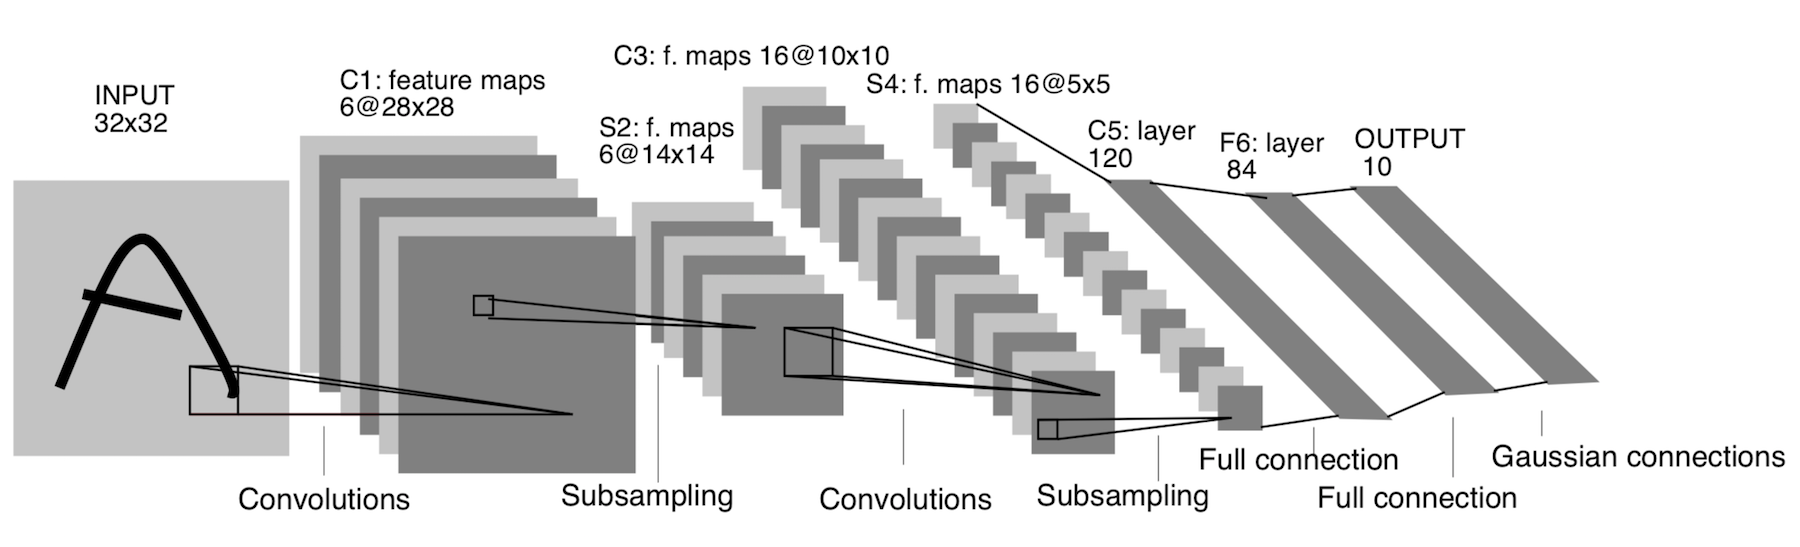

Данная архитектура была разработана для распознавания рукописных цифр. Она решала эту задачу лучше остальных алгоритмов. Но внимание к сверточным нейронным сетям было недостаточным до тех пор, пока в 2012 году не появилась сеть AlexNet, которая обошла все остальные подходы в конкурсе ImageNet. 



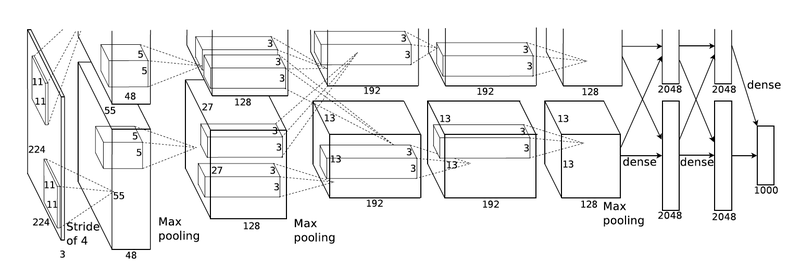

После этого произошел бум популярности сверточных нейронных сетей в компьютерном зрении. Появилось множество новых архитектур, которые становились все более глубокими, появились ухищрения как обучать таких монстров.

## Свертка

Свертка — операция над парой матриц A (размера nx×ny) и B (размера mx×my), результатом которой является матрица C=A∗B размера (nx−mx+1)×(ny−my+1). Каждый элемент результата вычисляется как скалярное произведение матрицы B и некоторой подматрицы A такого же размера (подматрица определяется положением элемента в результате). 

![image](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)

То есть мы задаем некую матрицу --  ядро, которое обычно является квадратной матрицей небольшого размера, состоящей из вещественных чисел (это и будут наши обучаемые веса). 

Это ядро перемещается по матрице (которая является обрабатываемым изображением или результатом других сверток), совершая поэлементное умножение пересекшихся матриц. 

Далее результаты умножения складываются между собой (на самом деле туда же добавляется некоторое смещение). В результате мы получаем одной число, которое записывается в результирующую матрицу в позицию, соответствующую положению ядра свертки на момент вычислений.

![image](https://miro.medium.com/max/535/1*hKkrLnzObzGtn7oeV4QRmA.gif)










Давайте посмотрим на примере, почему нас так интересует операция свертки.

Если некоторая характеристика присутствует во фрагменте изображения под ядром свертки, операция свертки на выходе будет выдавать большое значение. Если же характеристика отсутствует, выходное значение будет маленьким.

Давайте приведем несколько игрушечных примеров для визуализации.

In [1]:
import cv2
import torch
import numpy as np
import torchvision
from torch import nn


from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt

In [ ]:
# загрузим датасет MNIST 
test_data = torchvision.datasets.MNIST(
    root="datasets",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
# Берем первое изображение из датасета
image, _ = test_data[0]
image = image.squeeze().numpy()
print(image.shape)
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')

In [ ]:
# Создадим ядро
kernel = np.array(
    [
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
    ],
    dtype=np.float32
)
# Нормализуем его (только для того, чтобы результат работы не превышал 1)
kernel /= np.sum(kernel)

# Применяем к изображению фильтр
conv_result = cv2.filter2D(image, -1, kernel)

# Добавляем смещение
conv_result -= 0.5

# Применяем  ReLU
conv_result[conv_result < 0] = 0

# Отображаем результат
figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(25, 10))
for img, subplot in zip([image, conv_result, kernel], plots):
    subplot.imshow(img, cmap='gray')
plt.show()

In [ ]:
# Создадим ядро
kernel = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ],
    dtype=np.float32
)
# Нормализуем его (только для того, чтобы результат работы не превышал 1)
kernel /= np.sum(kernel)

# Применяем к изображению фильтр
conv_result = cv2.filter2D(image, -1, kernel)

# Добавляем смещение
conv_result -= 0.6

# Применяем  ReLU
conv_result[conv_result < 0] = 0

# Отображаем результат
figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(25, 10))
for img, subplot in zip([image, conv_result, kernel], plots):
    subplot.imshow(img, cmap='gray')
plt.show()

In [ ]:
# Создадим ядро
kernel = np.array(
    [
        [1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
    ],
    dtype=np.float32
)
# Нормализуем его (только для того, чтобы результат работы не превышал 1)
kernel /= np.sum(kernel)

# Применяем к изображению фильтр
conv_result = cv2.filter2D(image, -1, kernel)

# Добавляем смещение
conv_result -= 0.6

# Применяем  ReLU
conv_result[conv_result < 0] = 0

# Отображаем результат
figure, plots = plt.subplots(ncols=3, nrows=1, figsize=(25, 10))
for img, subplot in zip([image, conv_result, kernel], plots):
    subplot.imshow(img, cmap='gray')
plt.show()

Давайте сделаем то же самое при помощи PyTorch. Для применения двумерной свертки нам нужен класс [Conv2d](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html).

In [ ]:
# Создаем сверточный слой
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=5, stride=1, padding=2)
# Выведем веса
print(conv.weight)
# Выведем смещение
print(conv.bias)

In [18]:
# Создадим ядро
kernel = np.array(
    [[[
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
    ]]],
    dtype=np.float32
)
# Нормализуем его (только для того, чтобы результат работы не превышал 1)
kernel /= np.sum(kernel)
# Обмновим веса
conv.weight.data = torch.tensor(kernel)

# Обновим смещение
conv.bias.data = torch.tensor([-0.5])


In [ ]:
# Берем первый элемент из датасета
image, _ = test_data[0]
# Добавим ему размерность, чтобы был формат N, C, H, W
image = torch.unsqueeze(image, 0)

# Применим ReLU(Conv2d(image))
res = nn.ReLU()(conv(image))
res = res[0][0].detach().numpy()
# Отрисуем результат
plt.figure(figsize=(10, 10))
plt.imshow(res, cmap='gray')

Вы могли заметить несколько параметров, которые мы указали при создании объекта класса Conv2d. Давайте разберемся с ними подробнее. 

### Padding

Посмотрим еще раз на эту картинку:


![image](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)

Мы можем заметить, что после выполнения свертки размер выхода уменьшился. 
Все дело в том, что крайние пиксели не попадают в центр ядра, что обусловлено принятыми правилами передвижения. Иногда нам нужно вернуть результат такого же размера, как и исходная матрица. Для этого используется Паддинг. По сути мы добавляем дополнительные пиксели по краям исходного изображение, чтобы после свертки мы получили на входе и выходе матрицы с одинаковыми размерами.

![image](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/same_padding_no_strides.gif)

Играясь с размером паддинга мы можем получить различные размеры выходной матрицы. 

![image](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/full_padding_no_strides.gif)

Но, очевидно, нет особого смысла делать padding большего размера, чем ядро.

### Stride


Довольно часто мы хотим уменьшить размер выходной матрицы. 
Один из способов достижения такого результата — использование пулингового  слоя, о котором мы поговорим ниже.

Другой способ — использование страйда. По-сути мы просто перемещаем наше ядро с заданным шагом. В результате выходная матрица уменьшается в размерах относительно входной.


![](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_strides.gif)

### Сравнение с полносвязным слоем

Допустим у нас есть изображение с размером (4, 4) и ядро свертки (3, 3). 
Как на нашей уже знакомой гифке:

![image](https://raw.githubusercontent.com/vdumoulin/conv_arithmetic/master/gif/no_padding_no_strides.gif)

На выходе мы получаем изображение размером (2, 2). Для того, чтобы сделать такое же при помощи полносвязного слоя нам необходимо растянуть наше исходно изображение в вектор длины 16 и умножить на матрицу с весами:




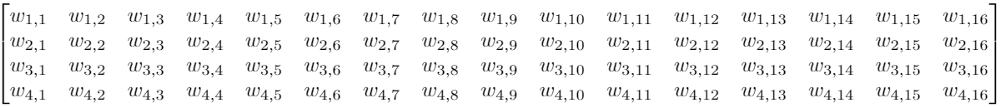

Вспомним картинку из урока 3)))

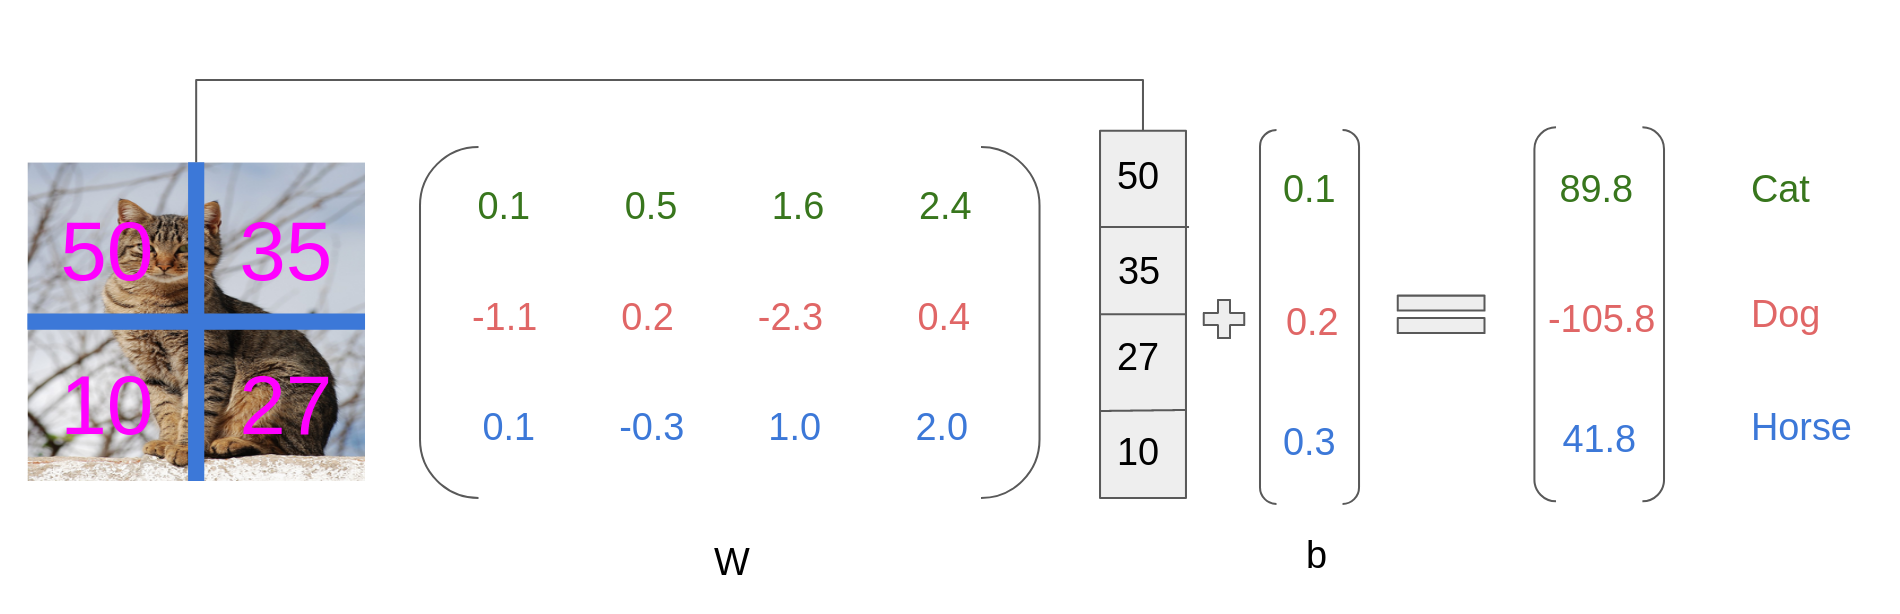

То, что делают свертки может показаться не совсем очевидным, но это по факту все тот же линейный оператор. Только его матрица будет иметь специфичный вид. Для нашего случая с ядром (3, 3) соответствующая матрица линейного оператора будет выглядеть следующим образом:



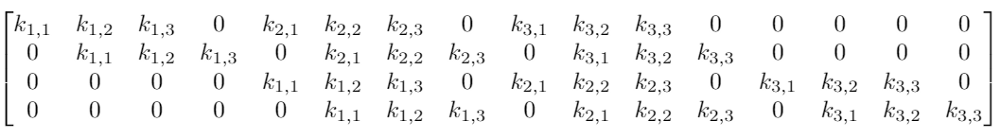

Обратите внимание на сходство данноых матриц. Хоть и размерности матриц идентичны, но в первом случае матрица является характеристикой множественных связей между одномерными слоями, во втором же случае — характеристикой работы ядра в двумерном пространстве.

Также мы можем обратить внимание на то, что в данной матрице всего лишь 9 параметров, вместо 64. Остальные нули.

### Многоканальная версия свертки

До этого момента у нас в качестве входной матрицы была матрица размером (H, W). Но как же быть в случае, если у нас на вход подается цветная картинка? Тогда наша матрица уже будет иметь размеры (C, H, W), где C = 3.
Как изменится операция свертки в таком случае?

До этого мы использовали одно ядро свертки. Мы бы могли и сейчас просто пройтись данным ядром по каждому из каналов. Но это не очень хорошая идея, так как мы в таком случае пытались бы найти отклики на одинаковую фичу в разных каналах изображения. А они могут быть совершенно разные.

В таком случае мы просто увеличиваем количество ядер!

Пусть у нас есть RGB изображение, тогда для него зададим три ядра. Каждое ядро перемещается вдоль соответствующего ему входного канала, выдавая обработанную версию сигналов. Некоторые кернелы могут иметь более “сильные” веса, чем другие, отдавая предпочтение определенным входным каналам. (Например, если кернел, ответственный за красный канал, имеет более “сильные” веса, чем другие кернелы, нейронная сеть будет реагировать на красный цвет наиболее выражено.)

![image](https://miro.medium.com/max/700/1*Emy_ai48XaOeGDgykLypPg.gif)

Далее результаты работы каждого из кернелов суммируется с целью получения единого канала. Кернелы генерируют собственные версии каналов, что в комплексе является результирующим выходным каналом.

![image](https://miro.medium.com/max/2400/1*5otecXBNlms3lslqlYworA.gif)


И в конце мы прибавляем смещение:

![image](https://miro.medium.com/max/294/1*Sof4S1iHaMW1_dsrAAuS1Q.gif)

### Output channels

Мы с вами не поговорили про параметр, отвечающий за количество выходных каналов.

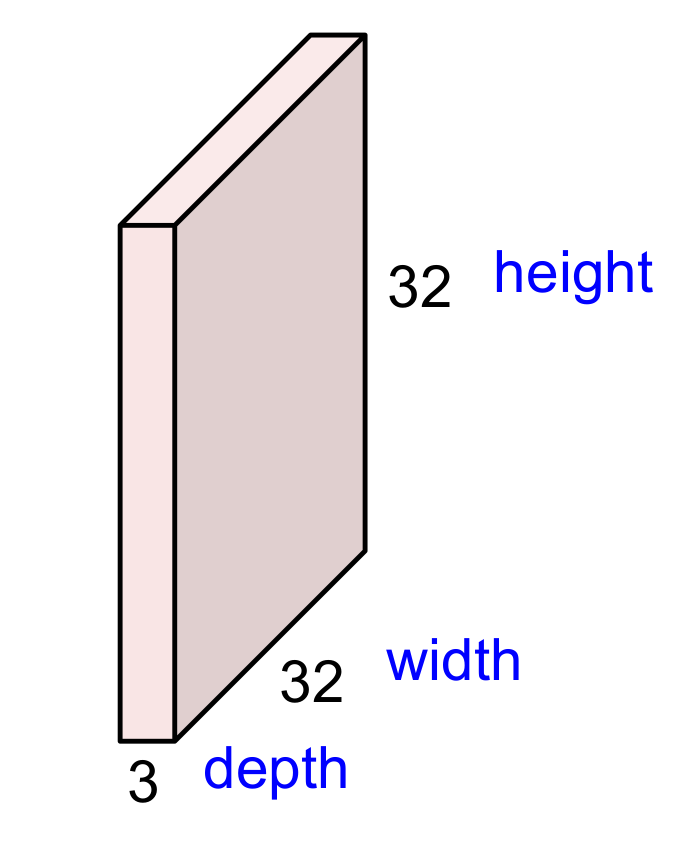

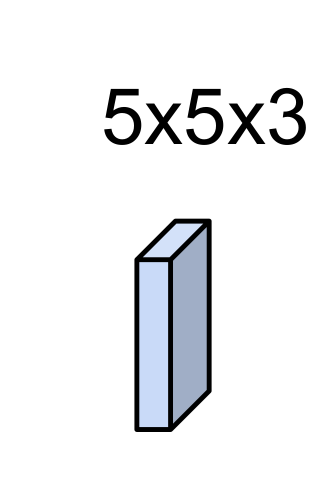

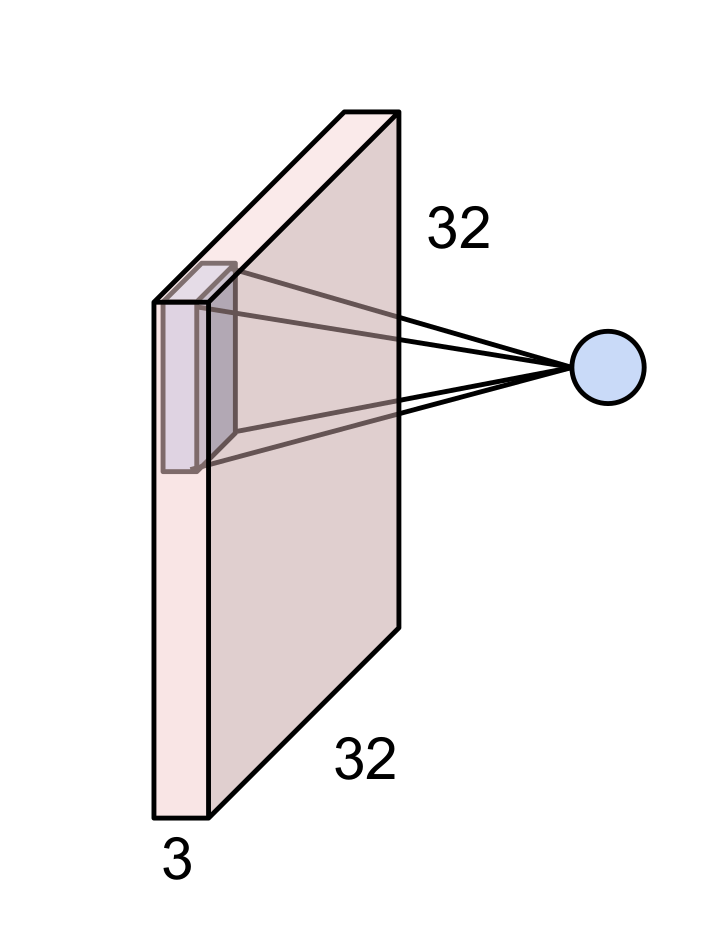

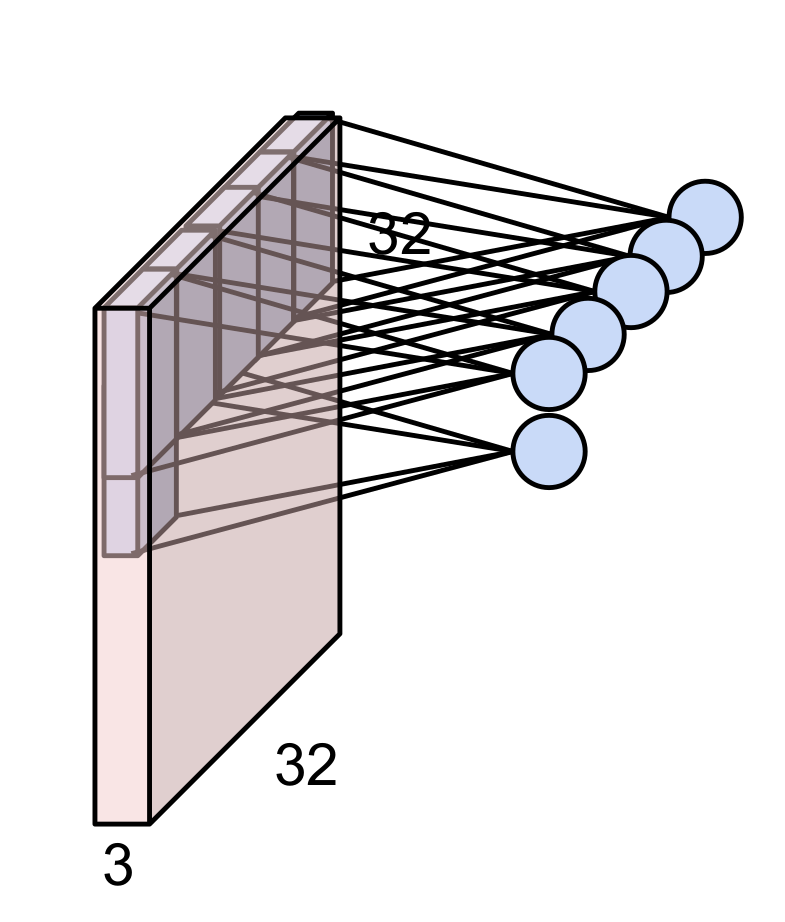

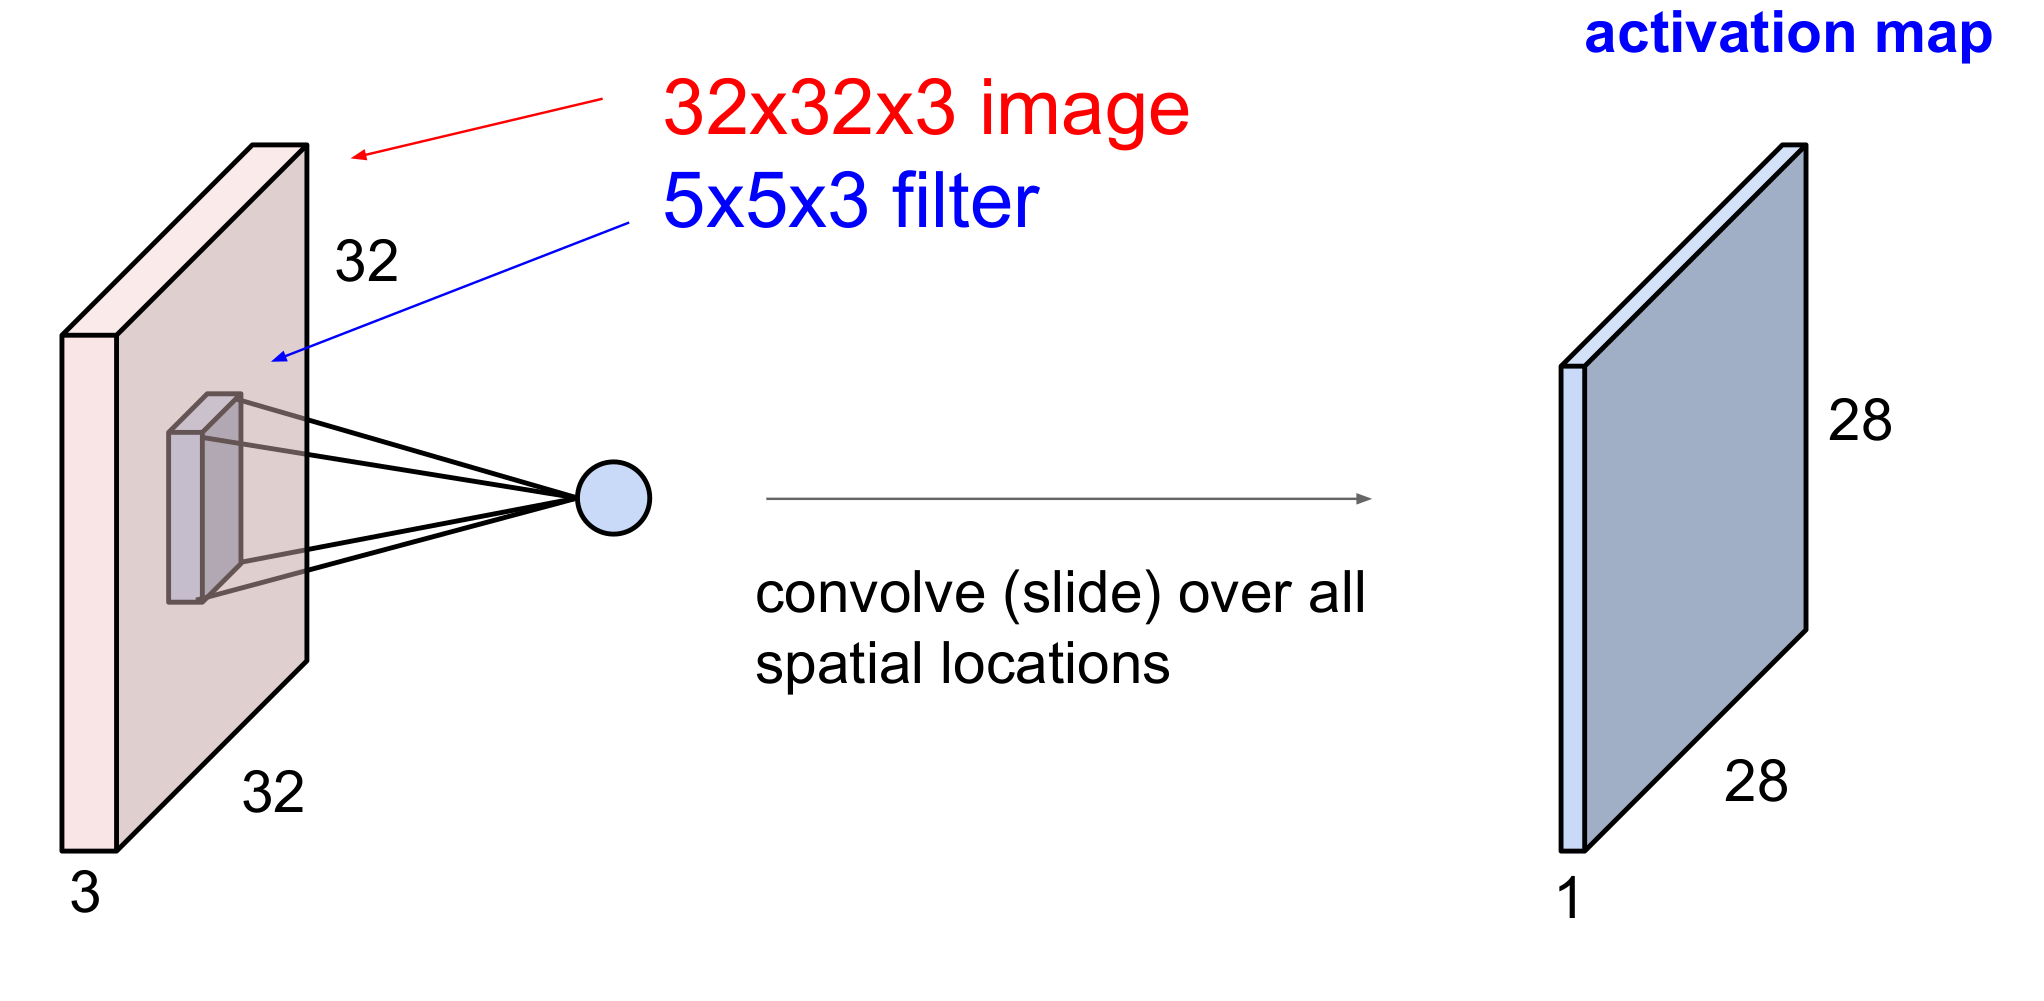

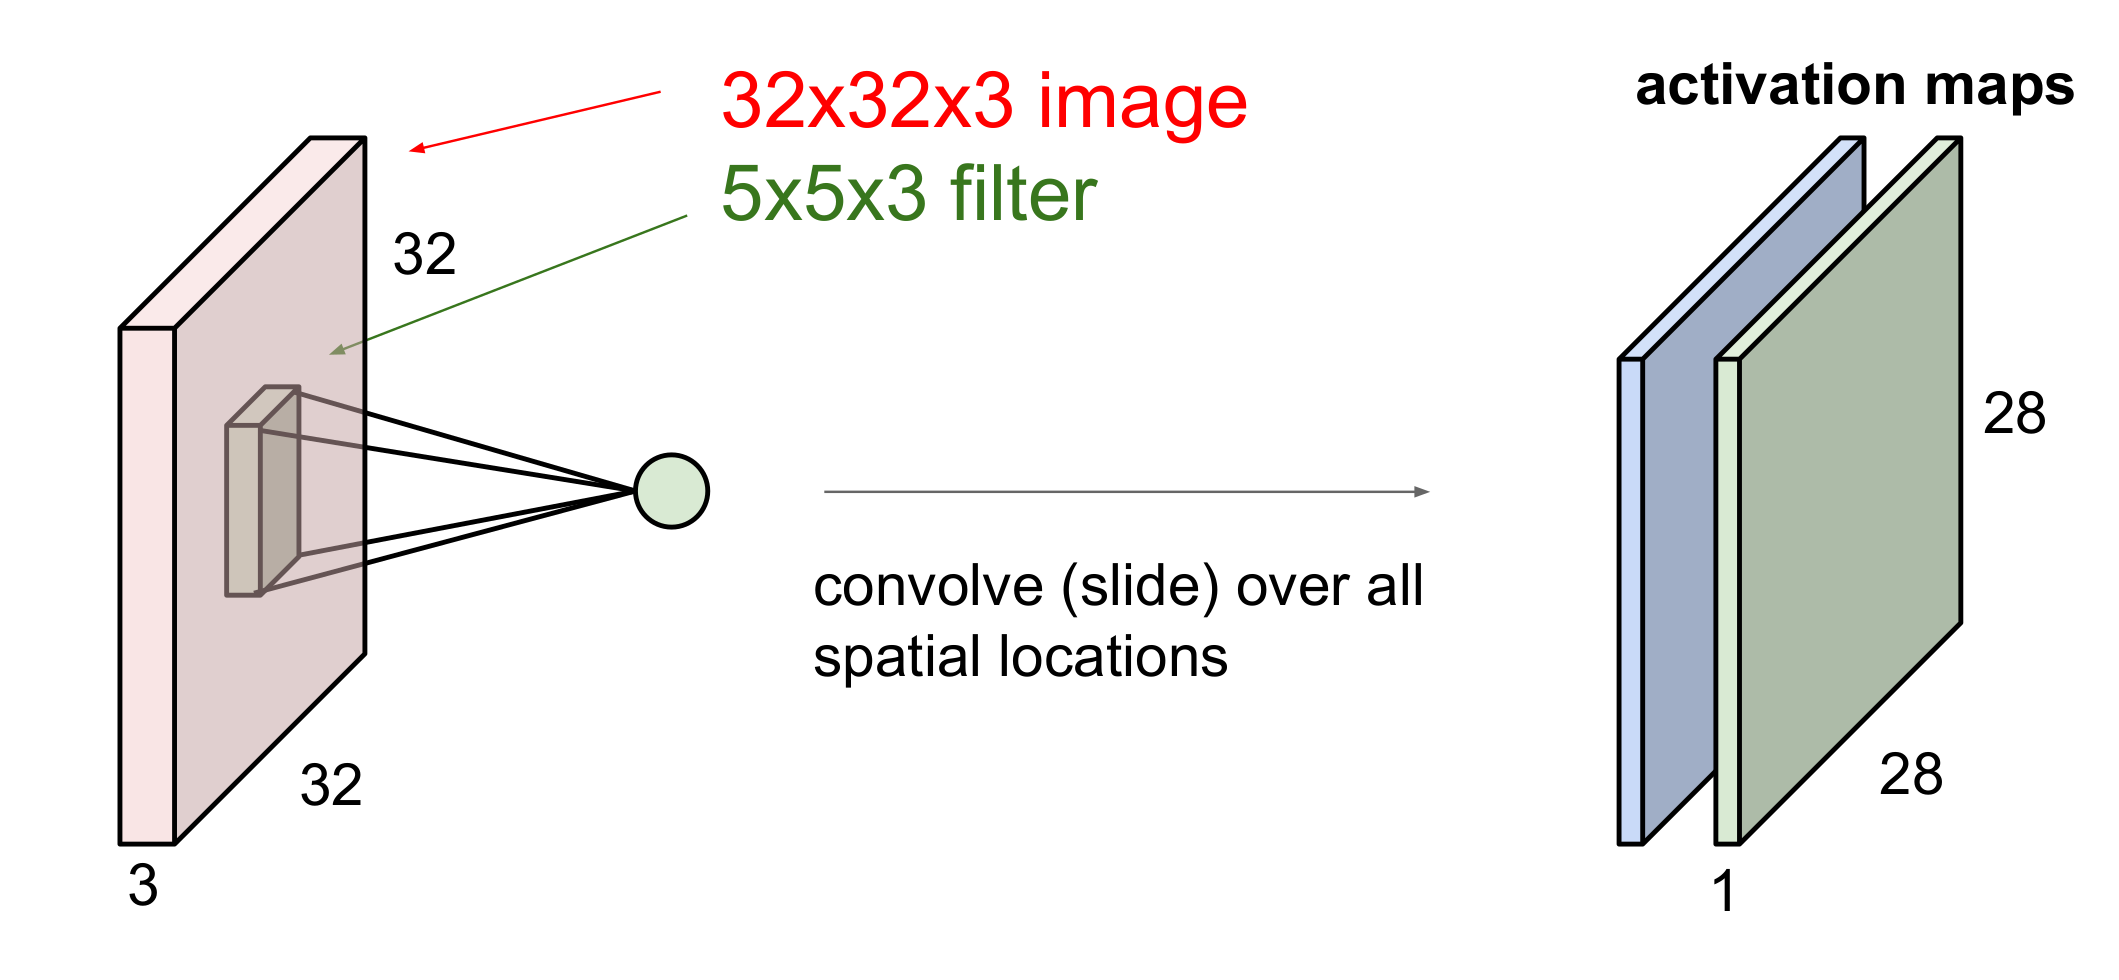

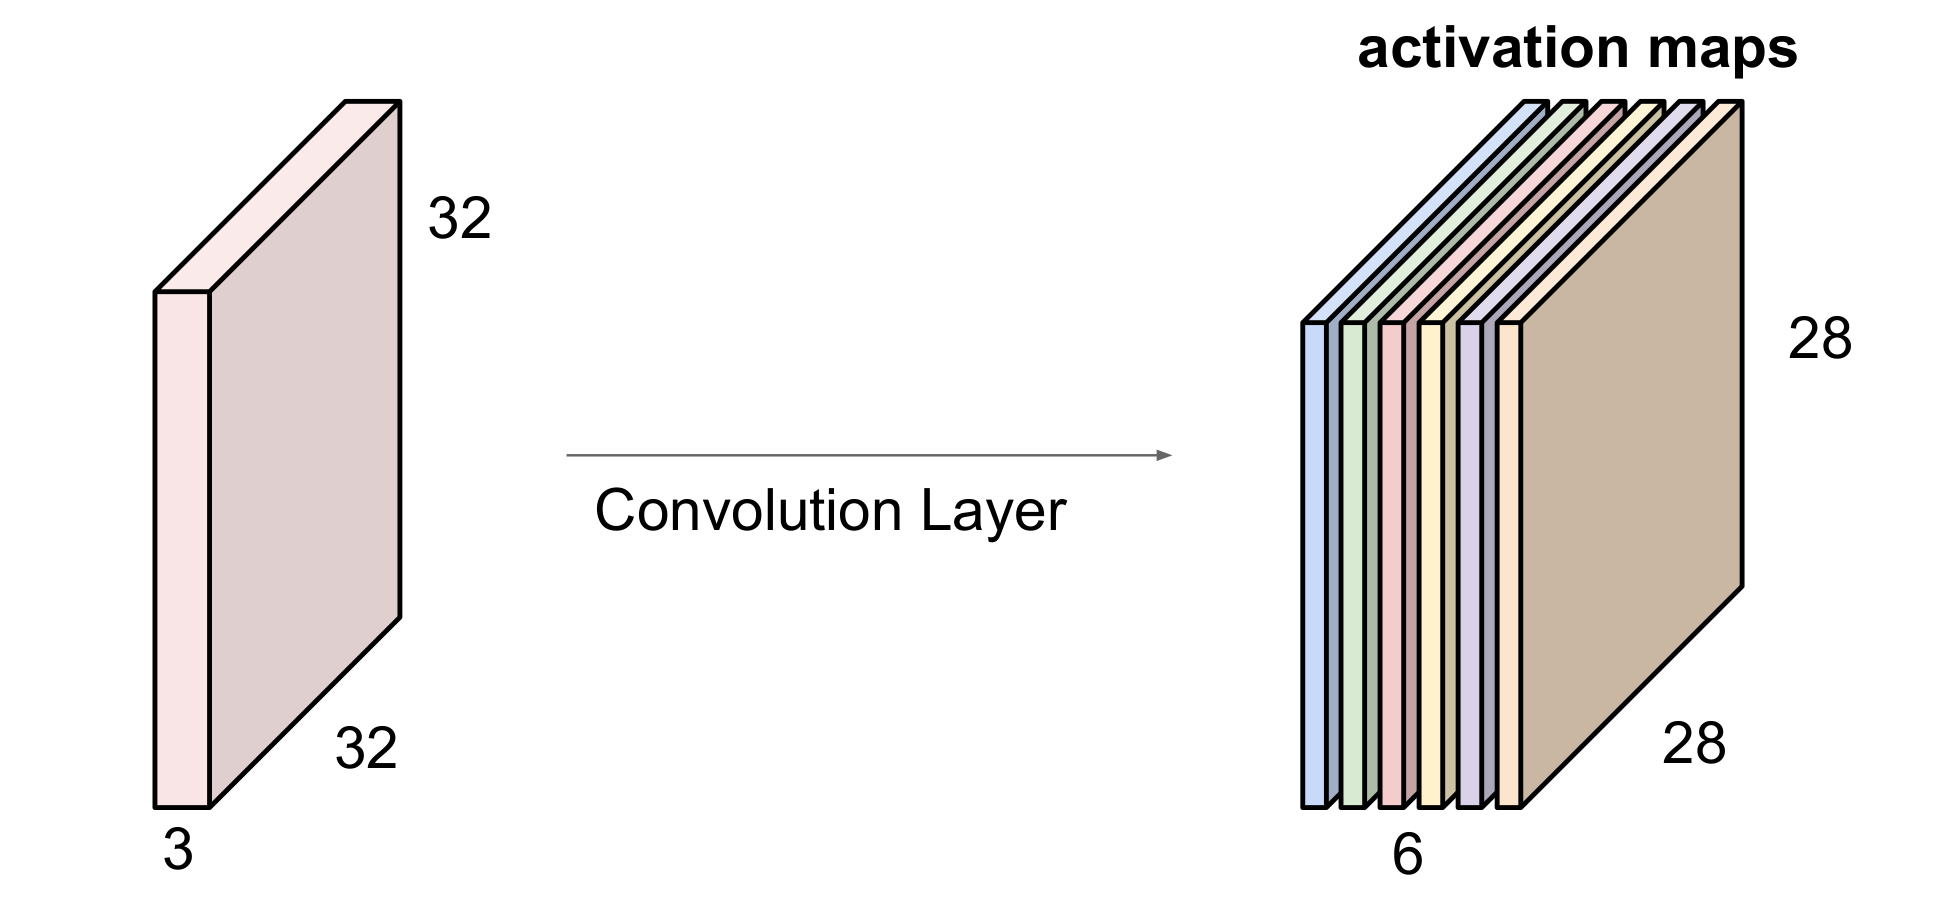

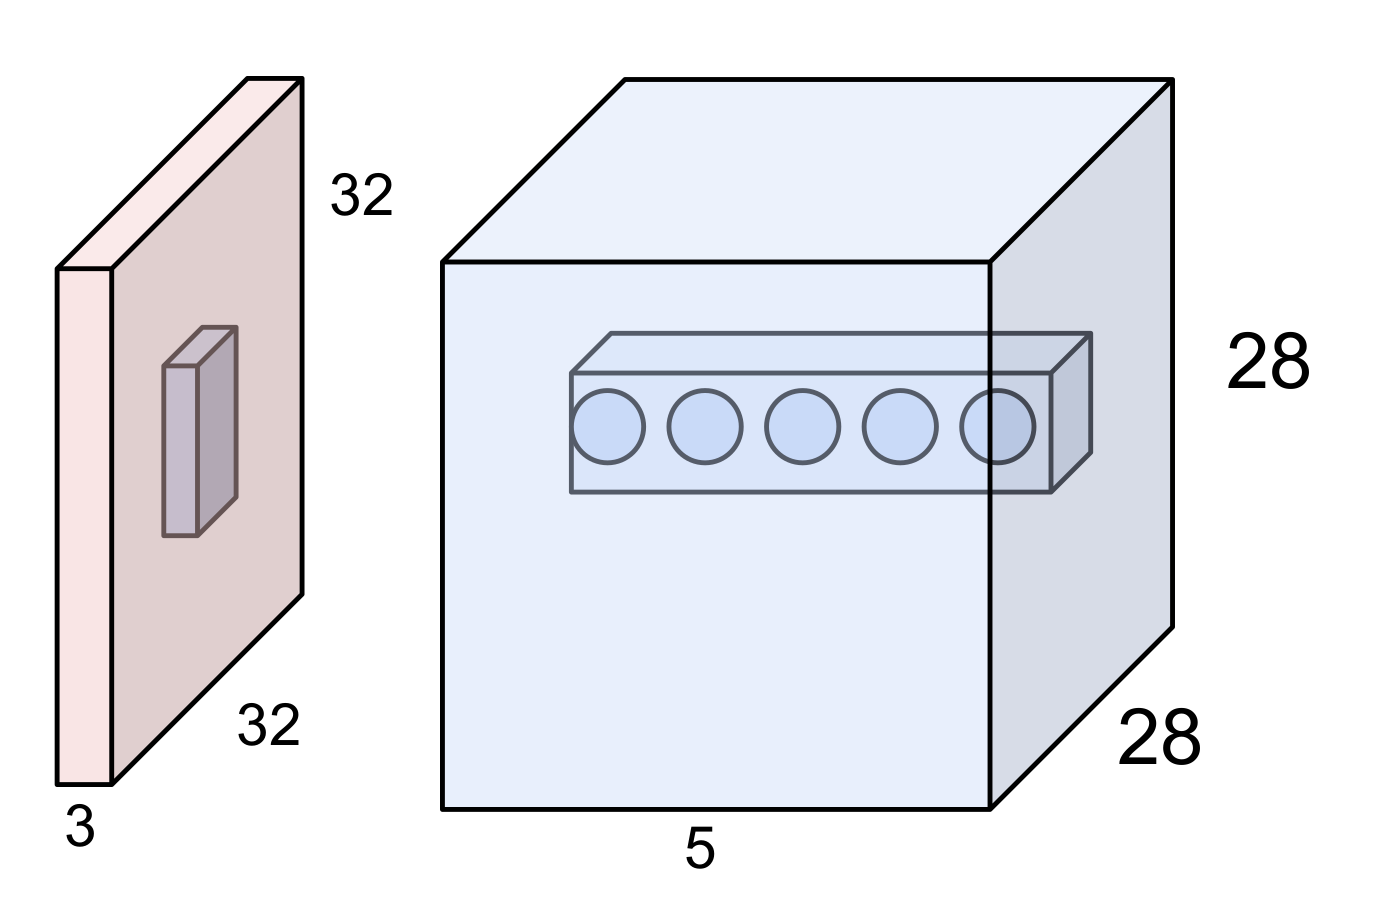


Для входного изображения с размерами $(С, W_1, H_1)$

Сверточный слой имеет 4 гиперпараметра:
- Количество фильтров $K$
- Размер ядра $F$
- Stride $S$
- Padding $P$


В результате будет получен выход с размерами $(K, W_2, H_2)$:

Где:
- $W_2 = (W_1 - F + 2P) / S + 1$
- $H_2 = (H_1 - F + 2P) / S + 1$

Количество обучаемых параметров: $F^2 * C * K + K$ смещений

### Pooling

Другим немаловажным строительным кирпичиком для сверточных нейронных сетей является операция пуллинга.

Идея заключается в следующем, после выхода сверточного слоя мы уменьшаем размер выходов, при этом стараясь сохранить наиболее важные активации.

Существует несколько популярных алгоритмов пуллинга. Посмотреть все алгоритмы, реализованные в пайторче можно [здесь](https://pytorch.org/docs/stable/nn.html#pooling-layers).


[MaxPool2d](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d)

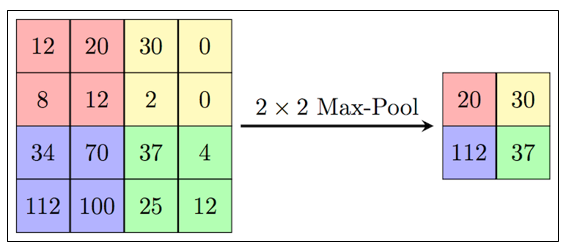

In [162]:
pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

In [ ]:
image, _ = test_data[0]
# Добавим ему размерность, чтобы был формат N, C, H, W
image = torch.unsqueeze(image, 0)
print(image.shape)

# Применим MaxPool(image)
res = pool(image)
res = res[0][0].detach().numpy()
print(res.shape)

# Отрисуем результат
plt.figure(figsize=(10, 10))
plt.imshow(res, cmap='gray')

In [170]:
pool = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)

In [ ]:
image, _ = test_data[0]
# Добавим ему размерность, чтобы был формат N, C, H, W
image = torch.unsqueeze(image, 0)
print(image.shape)

# Применим MaxPool(image)
res = pool(image)
res = res[0][0].detach().numpy()
print(res.shape)

# Отрисуем результат
plt.figure(figsize=(10, 10))
plt.imshow(res, cmap='gray')

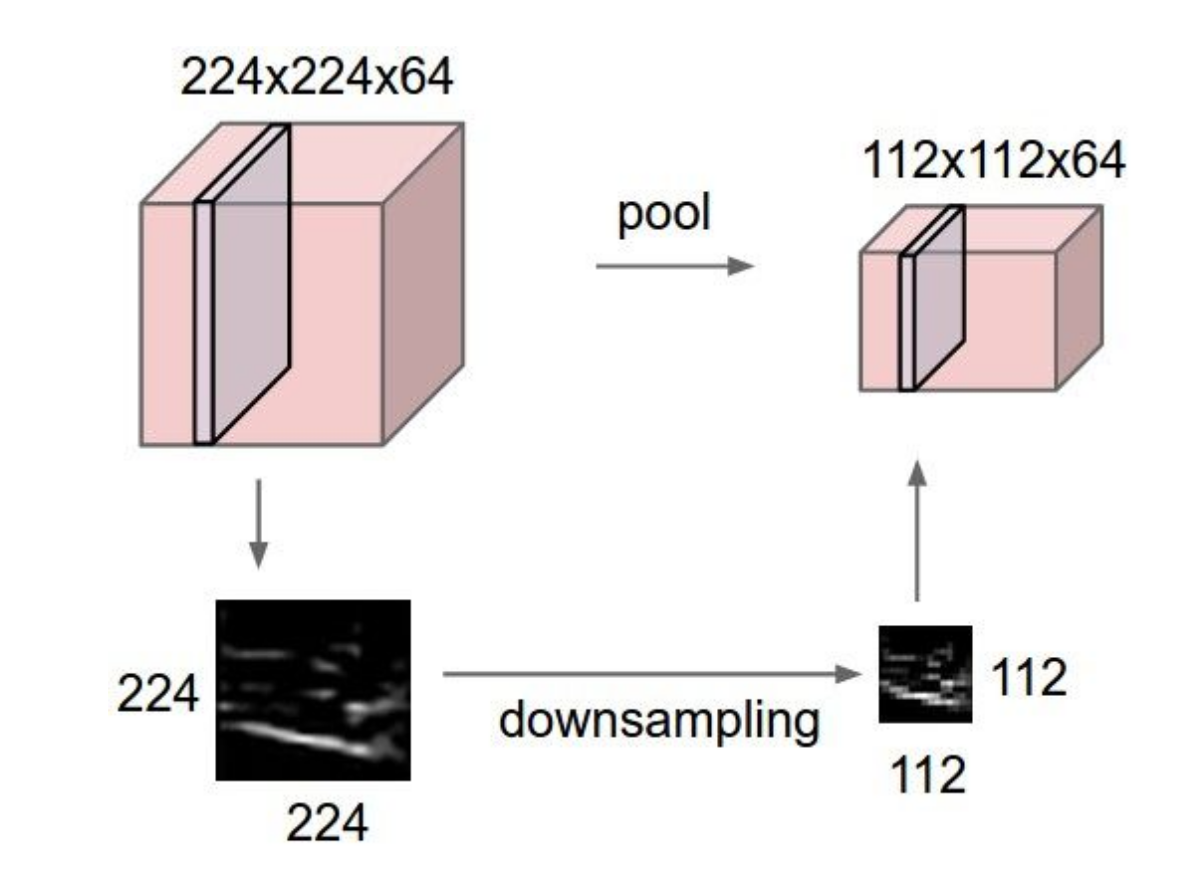


Для входного изображения с размерами $(С, W_1, H_1)$

Pooling слой имеет 2 гиперпараметра:
- Размер ядра $F$
- Stride $S$


В результате будет получен выход с размерами $(С, W_2, H_2)$:
- $W_2 = (W_1 - F ) / S + 1$
- $H_2 = (H_1 - F) / S + 1$


Количество обучаемых параметров: 0

## Поиграемся с моделькой

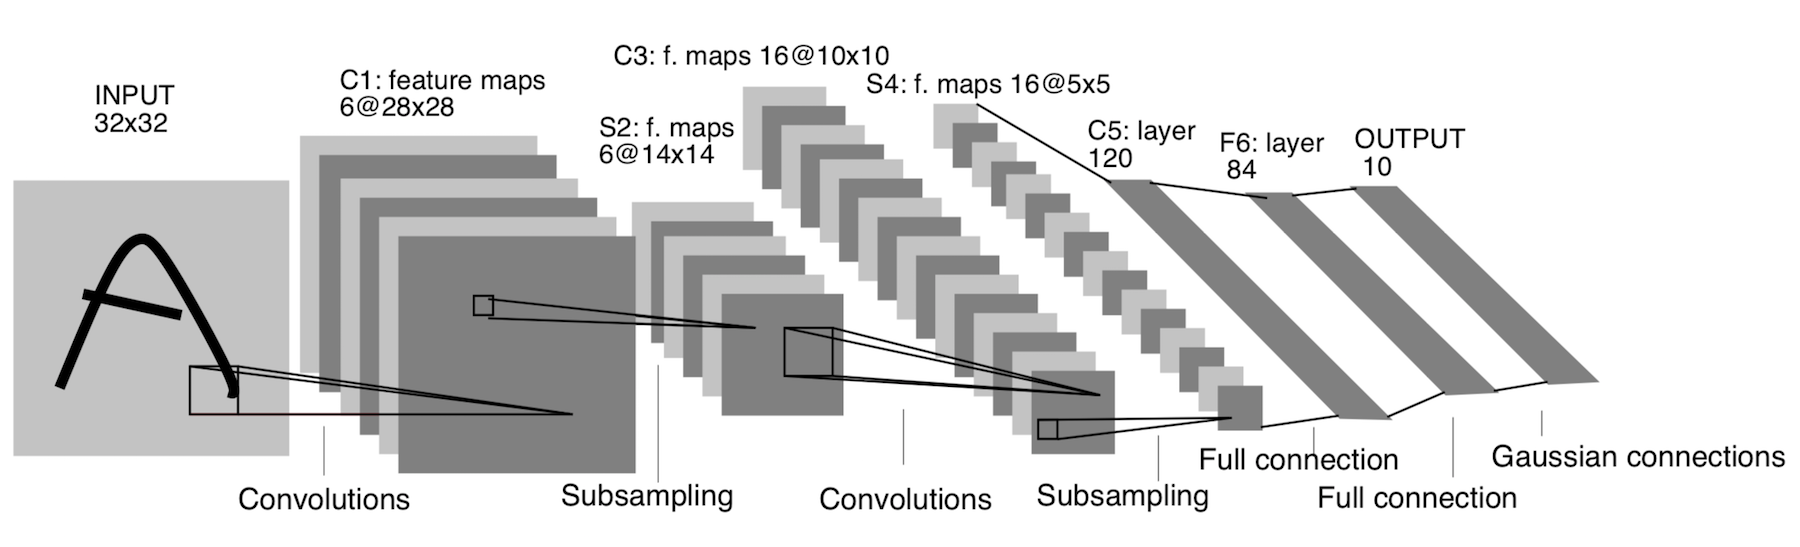

In [172]:
import cv2
import torch
import numpy as np
import torchvision
from torch import nn
from tqdm.notebook import tqdm
from torchvision import transforms
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

In [ ]:
%load_ext tensorboard

In [18]:
class LeNet5(nn.Module):
    def __init__(self, in_channels: int = 1, num_of_classes: int = 10):
        super(LeNet5, self).__init__()
        # feature extractor
        self.feature_extractor = nn.Sequential(            
            nn.Conv2d(
                in_channels=in_channels, 
                out_channels=6, 
                kernel_size=5, 
                stride=1
            ),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )
        # классификационная голова
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=num_of_classes),
            nn.Softmax(dim=1)
        )


    def forward(self, x):
        x = self.feature_extractor(x)
        #x = torch.flatten(x, 1)
        probs = self.classifier(x)
        #probs = F.softmax(logits, dim=1)
        return probs

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Давайте рассмотрим поближе каждый слой в данной моделе LeNet-5.

* C1: Первый сверточный слой с 6 ядрами размера 5×5 и страйдом = 1 и без паддингов. То есть на входе у этого слоя у нас будет изображение размером (1, 32, 32), на выходе будет (6, 28, 28).

* S2: Pooling слой с 6 ядрами 2×2 и страйдом = 2. На выходе мы получаем (6, 28, 28) тензор.

* C3: Второй сверточный слой с 16 ядрами размера 5×5 и страйдом = 1 и без паддингов. Выходной тензор имеет размер (16, 10, 10).

* S4: Pooling слой с 6 ядрами 2×2 и страйдом = 2. На выходе мы получаем (16, 5, 5) тензор. 

* C5: Третий сверточный слой со 120 ядрами размера 5×5. На вход ему приходит тензор размера (16, 5, 5), а на выходе получаем тензор размера (120, 1, 1). Далее применим к нему полносвязный слой и получим классификатор, как и ранее.

* F6: Первый полносвязный слой со входом 120 и выходом 84.

* F7: Последний полносвязный слой с выходом 10 (количество классов)

В оригинальной статье авторы использовали входное изображение размером 32.
В нашем же датасете все картинки имеют размер 28. Мы можем по-разному поступить в данной ситуации, чтобы заставить все работать. Но самым простым решением будет просто заресайзить все картинки в размер 32х32.

In [20]:
transform = transforms.Compose([transforms.Resize((32, 32)),
                                transforms.ToTensor()])

# download and create datasets
training_data = torchvision.datasets.MNIST(
    root='datasets', 
    train=True, 
    transform=transform,
    download=True
)

test_data = torchvision.datasets.MNIST(
    root='datasets', 
    train=False, 
    transform=transform,
    download=True
)



In [21]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [22]:
loss_fn = nn.CrossEntropyLoss()

In [130]:
model = LeNet5()
model.to(device)


learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
def train_loop(dataloader, model, loss_fn, optimizer, epoch_n, device, summary_writer):
    len_of_dataset = len(dataloader.dataset)
    batch_size = dataloader.batch_size
    num_batches = len(dataloader)

    train_loss, train_accuracy = 0, 0
    model.train()
    with tqdm(dataloader, unit='batch') as tepoch:
        for images, labels in tepoch:

            # Определяем описание для tqdm
            tepoch.set_description(f'Epoch {epoch_n}')

            images, labels = images.to(device), labels.to(device)
            # Делаем forward pass
            pred = model(images)
            # вычисляем loss
            loss = loss_fn(pred, labels)

            # Вычисляем градиенты
            optimizer.zero_grad()
            loss.backward()

            # Делаем шаг оптимизатора
            optimizer.step()

            # Вычисляем количество правильных ответов
            correct = (pred.argmax(1) == labels).sum().item()
            accuracy = correct / batch_size

            # Прибавляем loss и accuracy к полным значениям за эпоху
            train_loss += loss.item()
            train_accuracy += correct
            # Выводим в tqdm текущие лосс и точность
            tepoch.set_postfix(loss=loss.item(), accuracy=accuracy)

    # вычисляем среднее
    train_loss /= num_batches
    train_accuracy /= len_of_dataset

    # Записываем в тензорборд
    summary_writer.add_scalar(
        'train/loss',
        train_loss,
        epoch_n
    )

    summary_writer.add_scalar(
        'train/accuracy',
        train_accuracy,
        epoch_n
    )


In [25]:
def test_loop(dataloader, model, loss_fn, epoch_n,  device, summary_writer):
    len_of_dataset = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()
    # На этапе валидации нам не нужно вычислять градиенты
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            pred = model(images)
            test_loss += loss_fn(pred, labels).item()
            correct += (pred.argmax(1) == labels).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= len_of_dataset

    summary_writer.add_scalar(
        'test/loss',
        test_loss,
        epoch_n
    )

    summary_writer.add_scalar(
        'test/accuracy',
        correct,
        epoch_n
    )
    print(f'Test Metrics: \n Accuracy: {(correct):>0.3f}, Avg loss: {test_loss:>8f} \n')

In [ ]:
num_of_epochs = 10

writer = SummaryWriter('runs/lenet')


for epoch_n in range(num_of_epochs):
    train_loop(train_dataloader, model, loss_fn, optimizer, epoch_n, device, writer)
    test_loop(test_dataloader, model, loss_fn, epoch_n, device, writer)
print("Done!")

In [ ]:
%tensorboard --logdir runs/

In [173]:
def plot_filters_single_channel(weights, num_of_lines=16):
    
    #kernels depth * number of kernels
    nplots = weights.shape[0] * weights.shape[1]
    ncols = weights.shape[1]
    
    nrows = 1 + nplots//ncols
    #convert tensor to numpy image
    npimg = np.array(weights.numpy(), np.float32)
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    #looping through all the kernels in each channel
    for i in range(weights.shape[0]):
        if i >= num_of_lines and num_of_lines != -1:
            break
        for j in range(weights.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(weights[i, j].numpy(), np.float32)
            ax1.imshow(npimg, cmap='gray')
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

In [174]:
def plot_weights(model, layer_num, num_of_lines=16):
  #extracting the model features at the particular layer number
  layer = model.feature_extractor[layer_num]
  
  #checking whether the layer is convolution layer or not 
  if isinstance(layer, nn.Conv2d):
    #getting the weight tensor data
    weight_tensor = model.feature_extractor[layer_num].weight.data
    
    plot_filters_single_channel(weight_tensor, num_of_lines)


In [ ]:
plot_weights(model, 0)

In [ ]:
plot_weights(model, 3)

In [ ]:
plot_weights(model, 6)

In [134]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [ ]:
model

In [136]:
image, _ = test_data[1]
image = torch.unsqueeze(image, 0)

In [137]:
model.feature_extractor[1].register_forward_hook(get_activation('conv1'))
model.feature_extractor[4].register_forward_hook(get_activation('conv2'))
model.feature_extractor[7].register_forward_hook(get_activation('conv3'))
output = model(image)


In [ ]:
activation['conv1'].shape

In [ ]:
fig = plt.figure(figsize=(20, 3))
for i in range(6):

    ax1 = fig.add_subplot(1, 6, i+1)
    npimg = np.array(activation['conv1'].numpy().squeeze()[i], np.float32)
    ax1.imshow(npimg, cmap='gray')
    ax1.axis('off')

   
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i in range(16):

    ax1 = fig.add_subplot(4, 4, i+1)
    npimg = np.array(activation['conv2'].numpy().squeeze()[i], np.float32)
    ax1.imshow(npimg, cmap='gray')
    ax1.axis('off')

   
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(100, 100))

img = activation['conv3'].numpy()[0, :, 0, 0].reshape((1, 120))

plt.imshow(img, cmap='gray')


## Список доп материалов по визуализации сверточных нейронных сетей

* [Нейросеть учится на cifar10 онлайн смотреть без регистрации и смс](https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html)

* [Визуализация фич](https://distill.pub/2017/feature-visualization/)

* [Визуализация некоторых моделей](https://tensorspace.org/)

* [Визуализация сверток](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md)